In [56]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import optimize
import pandas as pd

from scipy import integrate
from scipy import special

In [57]:
# Parameters

m1 = 0.050      # 10                          #GeV DM Mass
delta= 0.3*m1      #0.2*m1
m2=m1+delta

mzprime=3*m1                                  #Mass of the dark photon in GeV    150 MeV
Mp = 1.22e19   
m=0.000501                                 # I choose the electron mass in Gev
mmu=0.1057                                 # mass of the muon in GeV


s0= m1**2 + m2**2 + 2*m1*m2


epsilon=1E-3               # Has inside some factors as indicated in the computation papers     1E-4
alpha_dark=1E-1               # what values?       (1E-3    -   1E-1)  
alpha_em=1/137




In [58]:
coannihilation= (4*np.pi*(epsilon**2)*alpha_dark*alpha_em*((m1+m2)**2))/(((m1+m2)**2 - (mzprime**2))**2)
coannihilation

1.4101234699357789e-06

In [59]:
T=np.linspace(10,0.1,1000)   # Temperature in MeV 

In [60]:
def scattering(T):
    return (16*np.pi*(epsilon)**2)*alpha_dark*alpha_em*(T**2)/mzprime**4

In [74]:
scattering(Tfo2)

5.560003416264709e-10

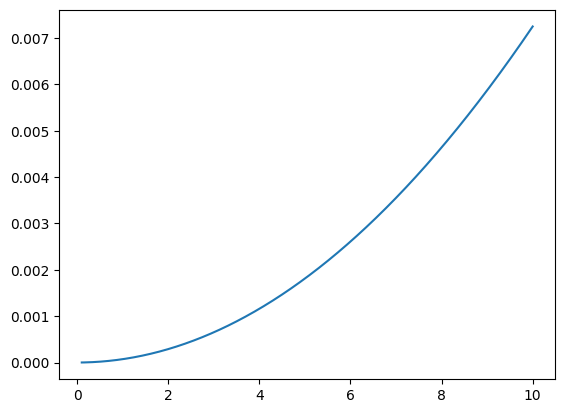

In [61]:
plt.plot(T,scattering(T))

In [62]:
decay=(4*(epsilon**2)*alpha_dark*alpha_em*(delta**5))/(15*np.pi*(mzprime**4))
decay

9.293719304636218e-17

# Using those approximations now I am going to compute the thermal coannihilation cross section times velocity

In [63]:
(3.36/np.sqrt(3.36))

1.833030277982336

In [64]:
def xf1(coannihilation):
    return np.log(0.038*(3.36/np.sqrt(3.36))*Mp*m1*coannihilation)- (0.5)*np.log(np.log(0.038*(3.36/np.sqrt(3.36))*Mp*m1*coannihilation))

def xf2(coannihilation):
    return np.log(0.038*(3.36/np.sqrt(3.36))*Mp*m2*coannihilation)- (0.5)*np.log(np.log(0.038*(3.36/np.sqrt(3.36))*Mp*m2*coannihilation))

In [65]:
print(xf1(coannihilation))
print(xf2(coannihilation))

Tfo1=m1/xf1(coannihilation)
Tfo2=m2/xf2(coannihilation)

print(Tfo1)
print(Tfo2)
print(((Tfo1+Tfo2)/2))

# WHICH TEMPERATURE DO I NEED TO CHOOSE?!?!?

23.210455027770372
23.467560891873568
0.0021542016276792945
0.0027697808178483705
0.0024619912227638327


In [66]:
NUMERATOR=integrate.quad(lambda s_tilda: coannihilation*(s_tilda-s0)*np.sqrt(s_tilda)*special.kv(1,np.sqrt(s_tilda)/(Tfo2)), s0, np.inf )[0]    

NUMERATOR

1.4902743439025128e-32

In [67]:
DENOMINATOR= 1/(8* m1**2 * m2**2  *(Tfo2) *(special.kn(2,m1/Tfo2)*(special.kn(2,m2/Tfo2))))

DENOMINATOR

5.034066621967543e+25

In [68]:
SIGMAVTERMAL=NUMERATOR*DENOMINATOR

SIGMAVTERMAL

7.502140332214219e-07

In [69]:
SIGMAVTERMAL*1.1669385*1E-17      # result in cm^3/s 

8.754536386063565e-24

### Close

# Now is the decay time

In [70]:
NUMERATOR_DECAY=integrate.quad(lambda s_tilda: decay*(s_tilda-s0)*np.sqrt(s_tilda)*special.kv(1,np.sqrt(s_tilda)/(Tfo2)), s0, np.inf )[0]    

NUMERATOR_DECAY

9.821970724139237e-43

In [71]:
DENOMINATOR_DECAY= 1/(8* m1**2 * m2**2  *(Tfo2) *(special.kn(2,m1/Tfo2)*(special.kn(2,m2/Tfo2))))

DENOMINATOR_DECAY

5.034066621967543e+25

In [72]:
SIGMAVTERMAL_DECAY=NUMERATOR_DECAY*DENOMINATOR_DECAY

SIGMAVTERMAL_DECAY

4.9444454984331714e-17

In [73]:
SIGMAVTERMAL_DECAY*1.1669385*1E-17      # result in cm^3/s 

5.769863813273358e-34

## Problems:
### -What masses do I need to use?
### -What temperatures do I need to use?
### -Why the approx of the decay is proportional to Delta?
### -The denominator ever change?

# Now is the scattering time
## This cross section depends on the temperature. But is refered to $\chi_2$ so maybe I have tp use the temperature pf freeze-out of $\chi_2$

In [75]:
NUMERATOR_SCATTERING=integrate.quad(lambda s_tilda: scattering(Tfo2)*(s_tilda-s0)*np.sqrt(s_tilda)*special.kv(1,np.sqrt(s_tilda)/(Tfo2)), s0, np.inf )[0]    

NUMERATOR_SCATTERING

5.876031865242966e-36

In [76]:
DENOMINATOR_SCATTERING= 1/(8* m1**2 * m2**2  *(Tfo2) *(special.kn(2,m1/Tfo2)*(special.kn(2,m2/Tfo2))))

DENOMINATOR_SCATTERING

5.034066621967543e+25

In [77]:
SIGMAVTERMAL_SCATTERING=NUMERATOR_SCATTERING*DENOMINATOR_SCATTERING

SIGMAVTERMAL_SCATTERING

2.95803358824373e-10

In [78]:
SIGMAVTERMAL_SCATTERING*1.1669385*1E-17      # result in cm^3/s 

3.451843278414756e-27